In [1]:
import numpy as np
import matplotlib.pyplot as plt

# optional pentru plot-uri mai frumoase
import arviz as az

az.style.use('arviz-whitegrid')

In [2]:
# Integratorul de RK4
def rk4(r,t,h):
    k1 = h*f(t,r)
    k2 = h*f(t+0.5*h,r+0.5*k1)
    k3 = h*f(t+0.5*h,r+0.5*k2)
    k4 = h*f(t+h,r+k3)
    return (k1+2*k2+2*k3+k4)/6

# Sistemul de ecuatii Lotka-Volterra
def f(t,r):
    # parametri
    alpha = 2/3
    beta = 4/3
    gamma = 1
    delta = 1

    # conditii intiiale
    x,y = r[0],r[1]

    # Evolutia sistemului
    #prada
    dxdt = alpha*x - beta*x*y
    #pradatori
    dydt = delta*x*y - gamma*y
    return np.array([dxdt,dydt],float)

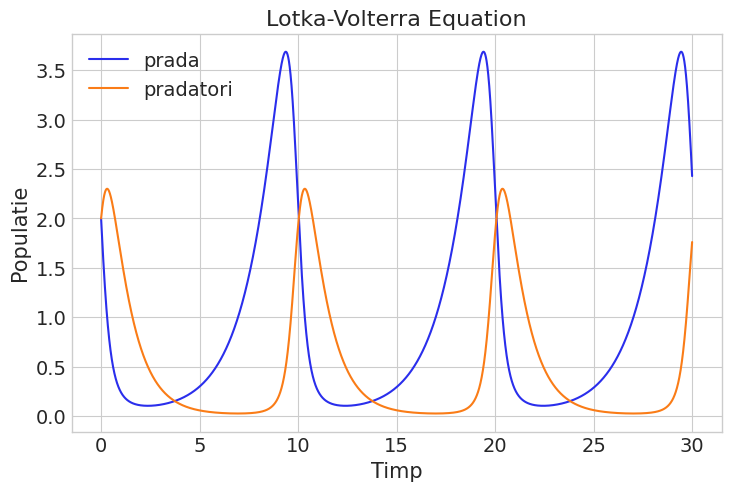

In [3]:
# pasul pt rk4
h = 0.001
# timeframe si vectori pentru pop prada si pradatori
tpoints = np.arange(0,30,h)
xpoints, ypoints = [],[]

# condtitii initiale
r = np.array([2,2],float)

# integrarea propriu-zisa
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    r += rk4(r,t,h)

plt.plot(tpoints, xpoints, label='prada')
plt.plot(tpoints, ypoints, label='pradatori')

plt.xlabel('Timp')
plt.ylabel("Populatie")
plt.title('Lotka-Volterra Equation')

plt.legend()
plt.savefig('lotka_volterra.png')

plt.show()


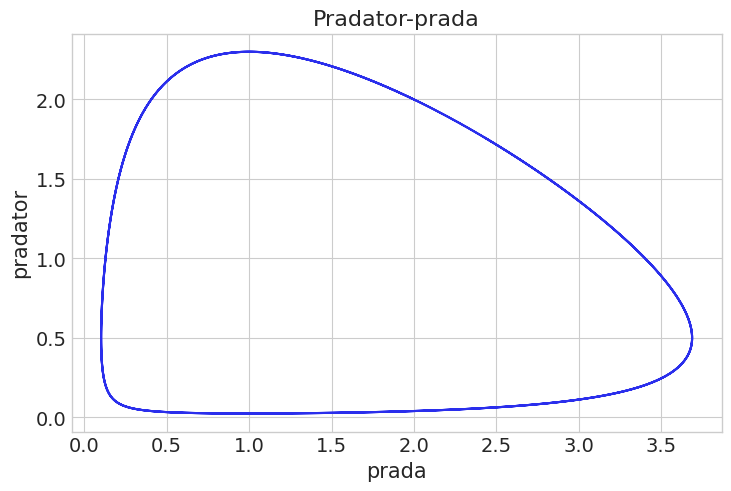

In [4]:
plt.plot(xpoints,ypoints)
plt.xlabel("prada")
plt.ylabel("pradator")
plt.title("Pradator-prada")
plt.savefig("lotka_volterra_pradatori_prada.png")

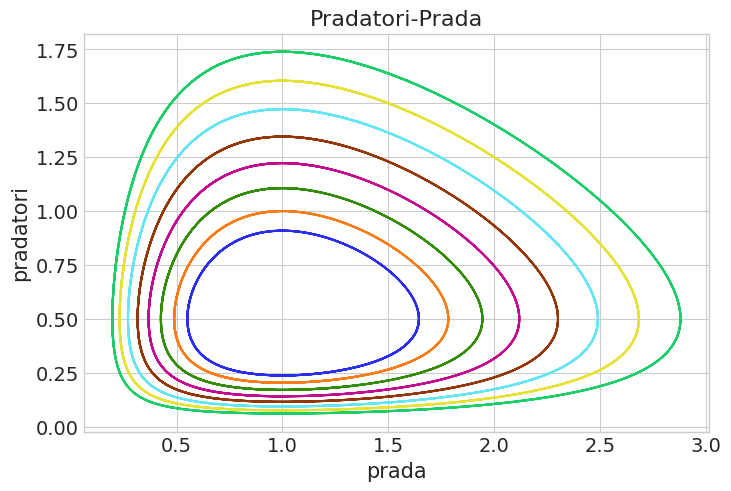

In [5]:
plt.figure()
for i in [0.9,1.,1.1,1.2,1.3,1.4,1.5,1.6]:
    # pasul pt rk4
    h = 0.001
    # timeframe si vectori pentru pop prada si pradatori
    tpoints = np.arange(0,30,h)
    xpoints, ypoints = [],[]

    # condtitii initiale
    r = np.array([i,i],float)

    # integrarea propriu-zisa
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        r += rk4(r,t,h)
    
    plt.plot(xpoints,ypoints)

plt.xlabel("prada")
plt.ylabel("pradatori")
plt.title("Pradatori-Prada")
plt.savefig("lotka_volterra_pradatori_prada_iteratii.png")